# Példa 4.7
Egy kör keresztmetszetű tartó adott keresztmetszetének terheléseit az ábra mutatja. Határozzuk meg A, B, C pontokban a főfeszültségeket és a hozzájuk tartozó főirányokat! Ábrázoljuk a főirányokat kiskockán!
<img src="./Fig_1.47.1.jpg" style="width: 500px;">

# Megoldás
A megoldás során szükségünk lesz a `sympy` modulra. Az egyes pontok koordinátáira szimbolikus változókat hozunk létre. Definiáljuk a bemenő adatokat és kiszámítjuk a keresztmetszet jellemző értékeit.

In [1]:
import sympy as sp
sp.init_printing()
y,z = sp.symbols('y,z')

d = 120 #mm
N = -50e3 #N
Mh = 4e6 #Nmm
Mt = 6e6 #Nmm

A = d**2*sp.pi/4
Iz = d**4*sp.pi/64
Ip = d**4*sp.pi/32

display(A.evalf(5)) #mm^2
display(Iz.evalf(5)) #mm^4
display(Ip.evalf(5)) #mm^4

Felírhatjuk az egyes terhelésekből adódó feszültségkomponenseket:

In [2]:
# Normál igénybevétel
σ_xN = N/A

# Hajlító igénybevétel
σ_xMh = Mh/Iz*y

# Csavaró igénybevételek
τ_xyt = Mt/Ip*z
τ_xzt = Mt/Ip*(-y)

print("Hajlításból származó normálfeszültség:")
display(σ_xMh.evalf(5)) #MPa
print("Nyírásból származó xy csúsztatófeszültség:")
display(τ_xyt.evalf(5)) #MPa
print("Nyírásból származó xz csúsztatófeszültség:")
display(τ_xzt.evalf(5)) #MPa

Hajlításból származó normálfeszültség:


Nyírásból származó xy csúsztatófeszültség:


Nyírásból származó xz csúsztatófeszültség:


Az egyes komponensekből összeállíthatjuk a paraméteres feszültségi tenzort, amibe behelyettesítve az egyes pontok koordinátáit, az ott jellemző feszültségi tenzort kapjuk.

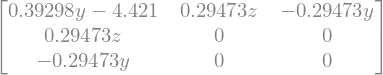

In [3]:
σ_matrix = sp.Matrix([[σ_xN+σ_xMh,τ_xyt,τ_xzt],[τ_xyt,0,0],[τ_xzt,0,0]])
σ_matrix.evalf(5)

In [4]:
# 'A' pont feszültségi tenzora
σ_A = σ_matrix.subs([(y,d/2),(z,0)])

# 'B' pont feszültségi tenzora
σ_B = σ_matrix.subs([(y,0),(z,d/2)])

# 'C' pont feszültségi tenzora
σ_C = σ_matrix.subs([(y,-d/2),(z,0)])

## Sajátérték, sajátvektor számítás

A feszültségi állapotot jellemző főfeszültségek és a hozzájuk tartozó főirányok megfeleltethetőek a feszültségi állapotot jellemző tenzor sajátértékeivel és sajátvektoraival.

A `sympy` segítségével a sajátértékeket és sajátvektorokat egy utasítással (`.eigenvects()`) megkaphatjuk. Mivel a `sympy` speciális esetekre is fel van készítve, ezért a megoldást erősen "becsomagolva" kapjuk meg.

Eredményül a mátrixhoz tartozó sajátérték/sajátvektor párokat kapjuk. Az `.eigenvects()` egy listát ad vissza. Ennek a listának az elemei olyan `tuple`-ök (a mi szempontunkból a `tuple` gyakorlatilag egy lista), melyek:

- A sajátérték
- A sajátérték multiplicitása (pl: ha két sajátérték egybeesik, akkor annak a multiplicitása 2 lesz)
- A sajátértékhez tartozó sajátvektor(ok) listája melynek elemszáma a az adott sajátérték multiplicitása

Tartsuk észben, hogy egy $3\times3$-as mátrix esetén ha egy sajátérték multiplicitása nagyobb mint egy, akkor az `sp.eigenvects` nem 3 elemű listát ad eredményül!  
Ha csak egy mátrixot kell kiértékeljünk, akkor a fent említett mennyiségek 'kézzel' is kiolvashatóak.

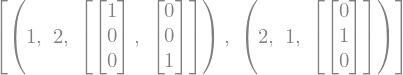

In [5]:
# Példa:
display(sp.Matrix([[1,0,0],[0,2,0],[0,0,1]]).eigenvects()) # Így néz ki, ha többszörösek a sajátértékek

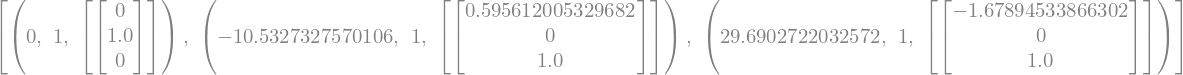

In [6]:
σ_A_sajat=σ_A.eigenvects()
display(σ_A_sajat) # Ilyen, ha egyszeresek

Az `.eigenvects()` függvény nem feltétlenül sorrendben adja vissza a sajátértékeket, ezért rendeznünk kell őket. Célszerű a sajátértékek alapján csökkenő sorrendbe tenni a fenti eredményt. Ezt a következő paranccsal tudjuk megtenni: `σ_A_sajat.sort(key = lambda x : x[0], reverse=True)`.

Rövid magyarázat:

- `lista.sort()`: a listát helyben rendezi, azaz a rendezetlen listát felülírja a rendezett listával,
- `key` =: ami alapján rendez, egyszerű számoknál, stringeknél erre nincs szükség (a mi kódunk is lefut key nélkül, de nem tudjuk, hogy mi alapján rendezi az elemeket, így biztonságosabb megadni a key-t),
- `lambda x : x[0]`: egy úgynevezett `lambda` függvény, ami a bemenő x-nek az első elemét adja vissza, azaz az első elem alapján fogunk rendezni,
- `reverse = True`: növekvő helyett csökkenő sorrendbe teszi az eredményt.



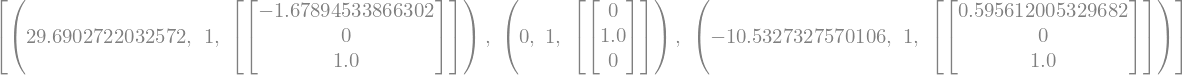

In [7]:
σ_A_sajat.sort(key = lambda x : x[0], reverse=True)
display(σ_A_sajat) # Ilyen, ha egyszeresek

## Automatizálás
Tegyük fel, hogy a lustaságunk által vezérelve nem szeretnénk minden mátrix eredményét kézzel kiolvasni/kiiratni a listákból. Írjunk egy függvényt ami automatizálja ezt a feladatot!

In [8]:
def print_eigensystem(matrix):
    # Legyen a függvény bemenete a vizsgálandó mátrix
    eig_system= matrix.eigenvects()
    
    # Az eredményt a program nem rendezi alapból a sajátértékek nagysága szerint, így azt nekünk kell megtenni
    # A rendezést a 'tuple'-ök első elemei szerint végezzük
    # Utánanézési lehetőség: lambda függvények, sorted() függvény 
    eig_system.sort(key=lambda x: x[0], reverse=True)
    
    # Végig iterálva az 'eig_system' elemein, kiiratjuk a főfeszültségeket és főirányokat
    n = 1
    for elem in eig_system:
        # Ha egy főfeszültség többszörös multiplicitású, akkor többször kell kiírni!
        for i in range(elem[1]): # Az 'elem[1]' értéke a multiplicitást mutatja meg.
                                 # 'range(elem[1])' : csinál egy 'range' objektumot, amin a 'for' ciklus végig
                                 # tud futni. Pontosan annyiszor fut le így a ciklus, amekkora számot adunk a
                                 # 'range' függvény argumentumaként, jelen esetben ez 'elem[1]', azaz a multiplicitás
            sajatertek = elem[0].evalf(5)
            # Normáljuk a sajátvektorokat, hogy egység hosszúságúak legyenek
            sajatvektor = (elem[2][i].normalized()).evalf(5) # '.normalize()': a vektort 1 hosszúságúra normálja
            # Az 'n' változóval sorszámozzuk az egyes értékeket
            print(str(n)+'. Főfeszültség: '+str(sajatertek.evalf(5))+' MPa')
            print(str(n)+'. Főirány: ')
            display(sajatvektor)
            n += 1 # sorszám léptetése

Innen az egyes pontokhoz tartozó jellemző értékeket mindössze 1 sor kóddal kiirathatjuk! <br>
$A$ pont:
<img src="./Fig_1.47.2.jpg" style="width: 500px;">

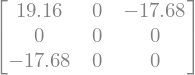

1. Főfeszültség: 29.690 MPa
1. Főirány: 


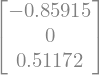

2. Főfeszültség: 0 MPa
2. Főirány: 


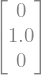

3. Főfeszültség: -10.533 MPa
3. Főirány: 


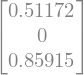

In [9]:
display(σ_A.evalf(4))
print_eigensystem(σ_A)

$B$ pont:
<img src="./Fig_1.47.3.jpg" style="width: 500px;">

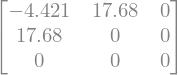

1. Főfeszültség: 15.611 MPa
1. Főirány: 


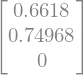

2. Főfeszültség: 0 MPa
2. Főirány: 


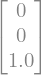

3. Főfeszültség: -20.032 MPa
3. Főirány: 


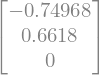

In [10]:
display(σ_B.evalf(4))
print_eigensystem(σ_B)

$C$ pont:
<img src="./Fig_1.47.4.jpg" style="width: 500px;">

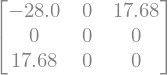

1. Főfeszültség: 8.5549 MPa
1. Főirány: 


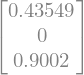

2. Főfeszültség: 0 MPa
2. Főirány: 


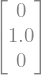

3. Főfeszültség: -36.554 MPa
3. Főirány: 


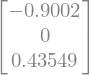

In [11]:
display(σ_C.evalf(4))
print_eigensystem(σ_C)